## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_study_df.count()
mouse_study_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. x
duplicate = mouse_study_df[mouse_study_df.duplicated()]
# Print the resultant Dataframe
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = mouse_study_df.loc[mouse_study_df["Mouse ID"]=='g989',:]

# Print the resultant Dataframe 
duplicate 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_working = mouse_study_df.drop(labels=duplicate.index,axis=0)

mouse_study_working.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_working['Mouse ID'].nunique()
#mouse_study_working.count()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
groupby_regimen = mouse_study_working.groupby("Drug Regimen")
mean = groupby_regimen[["Tumor Volume (mm3)"]].mean()
median= groupby_regimen[["Tumor Volume (mm3)"]].median()
variance = groupby_regimen[["Tumor Volume (mm3)"]].var()
standard_deviation = groupby_regimen[["Tumor Volume (mm3)"]].std()
sem = groupby_regimen[["Tumor Volume (mm3)"]].sem()

# Assemble the resulting series into a single summary dataframe.regimen_summary_stats
merge1 = pd.merge(mean, median, how="left", on=["Drug Regimen"], suffixes=('_a', '_b'))
merge2 = pd.merge(merge1, variance, how="left", on=["Drug Regimen"],suffixes=('_c'))
merge3 = pd.merge(merge2, standard_deviation, how="left", on=["Drug Regimen"], suffixes=('_d'))
merge_complete = pd.merge(merge3, sem, how="left", on=["Drug Regimen"], suffixes=('_e'))

merge_complete_table = merge_complete.rename(columns={"Tumor Volume (mm3)_a": "Tumor Volume Mean",
                      "Tumor Volume (mm3)_b": "Tumor Volume Median",
                      "Tumor Volume (mm3)_": "Tumor Volume Variance",
                      "Tumor Volume (mm3)d": "Tumor Volume STD",
                      "Tumor Volume (mm3)": "Tumor Volume SEM"}).round(4)
merge_complete_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3209,50.4463,43.8520,6.6221,0.5443
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

mouse_study_working.groupby('Drug Regimen').agg(
        # Get the mean of the 'Tumor Volume (mm3)
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
        # Get the median of the 'Tumor Volume (mm3)
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),
        # Get the variance of the 'Tumor Volume (mm3)
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),
        # Get the standard deviation of the 'Tumor Volume (mm3)
        Tumor_Vol_STD=('Tumor Volume (mm3)', np.std),
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)
).round(4)

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_STD,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3209,50.4463,43.8520,6.6221,0.5443
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


## Bar and Pie Charts

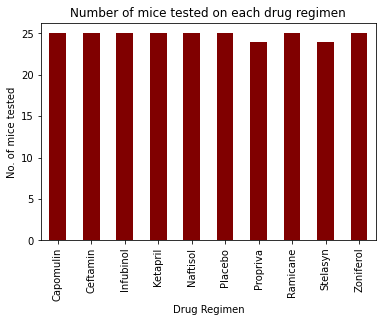

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

no_of_mice = groupby_regimen['Mouse ID'].nunique()
no_of_mice.plot(kind="bar", color = "maroon")

plt.xlabel("Drug Regimen") 
plt.ylabel("No. of mice tested") 
plt.title("Number of mice tested on each drug regimen") 
plt.show() 

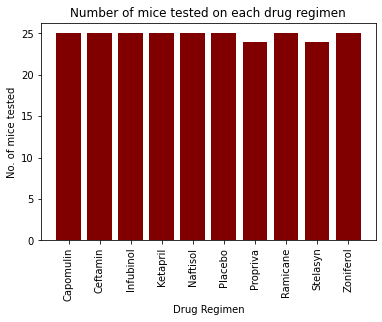

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
no_of_mice = groupby_regimen['Mouse ID'].nunique()
plt.bar(x_axis, no_of_mice, color ='maroon')
plt.xticks(x_axis, rotation="vertical")

plt.xlabel("Drug Regimen") 
plt.ylabel("No. of mice tested") 
plt.title("Number of mice tested on each drug regimen") 
plt.show() 

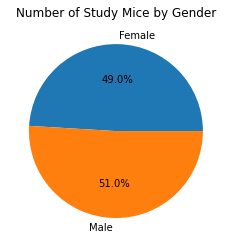

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_study_working.groupby(["Sex"])["Mouse ID"].count().plot.pie(title="Number of Study Mice by Gender",label="",autopct="%1.1f%%")


C:\Users\melis\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


Text(0.5, 1.0, 'Mice by gender')

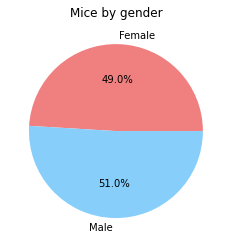

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender=mouse_study_working.groupby("Sex")[['Mouse ID']].count()
colors=["lightcoral", "lightskyblue"]
plt.pie(gender, labels = gender.index, colors = colors, autopct ="%1.1f%%")
plt.title('Mice by gender')

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = mouse_study_working.groupby("Mouse ID")[["Timepoint"]].max()
final_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_final_timepoint = pd.merge(mouse_study_working, final_timepoint, on=["Timepoint"])
merged_final_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,k403,Ramicane,Male,21,16,0,45.0,0
2,k403,Ramicane,Male,21,16,0,45.0,0
3,k403,Ramicane,Male,21,16,0,45.0,0
4,k403,Ramicane,Male,21,16,0,45.0,0


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mouse_study_working.quantile([.25,.5,.75])
quartiles
number_under_q1 = mouse_study_working.count()
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0.25,7.00,25.0,5.0,45.000000,0.0
0.50,13.00,27.0,20.0,48.933454,1.0
0.75,19.25,29.0,30.0,56.324075,2.0


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
